HOW to learn → optimizer

WHAT to learn → loss

HOW to measure progress → metrics

# Gradient descent (SGD - Full batch - Mini batch)

In [1]:
import numpy as np 
import matplotlib as plt 

In [5]:
# ------------------------------------------
# 1) Batch Gradient Descent
# ------------------------------------------
def batch_gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    losses = []

    for i in range(iterations):
        # Predictions
        y_pred = np.dot(X, w) + b

        # Compute gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        # Update weights
        w -= learning_rate * dw
        b -= learning_rate * db

        # Compute and save loss
        loss = np.mean((y_pred - y)**2)
        losses.append(loss)

    return w, b, losses

In [6]:
# ------------------------------------------
# 2) Stochastic Gradient Descent (SGD)
# ------------------------------------------
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    losses = []

    for i in range(iterations):
        # Pick a random index
        idx = np.random.randint(m)

        # Single sample
        X_i = X[idx]
        y_i = y[idx]

        # Prediction
        y_pred = np.dot(X_i, w) + b

        # Gradients
        dw = (y_pred - y_i) * X_i
        db = (y_pred - y_i)

        # Update
        w -= learning_rate * dw
        b -= learning_rate * db

        # Compute full loss for tracking
        full_pred = np.dot(X, w) + b
        loss = np.mean((full_pred - y)**2)
        losses.append(loss)

    return w, b, losses


In [7]:
# ------------------------------------------
# 3) Mini-Batch Gradient Descent
# ------------------------------------------
def mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    losses = []

    for i in range(iterations):
        # Shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Process mini-batches
        for start in range(0, m, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Prediction
            y_pred = np.dot(X_batch, w) + b

            # Gradients
            dw = (1/len(X_batch)) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (1/len(X_batch)) * np.sum(y_pred - y_batch)

            # Update
            w -= learning_rate * dw
            b -= learning_rate * db

        # Record full loss per epoch
        full_pred = np.dot(X, w) + b
        loss = np.mean((full_pred - y)**2)
        losses.append(loss)

    return w, b, losses

In [10]:
# ------------------------------------------
# 4) Visualization Function
# ------------------------------------------
import matplotlib.pyplot as plt
def plot_losses(losses, title):
    plt.figure(figsize=(6,4))
    plt.plot(losses)
    plt.xlabel("Iterations")
    plt.ylabel("MSE Loss")
    plt.title(title)
    plt.grid(True)
    plt.show()

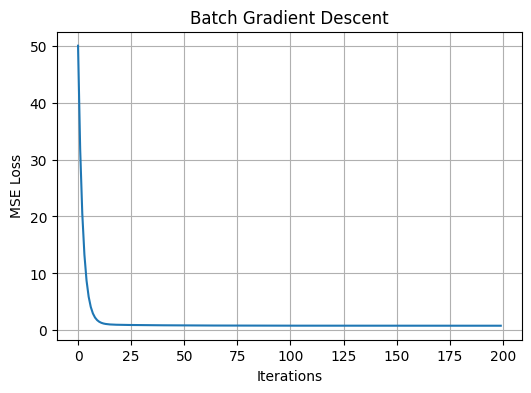

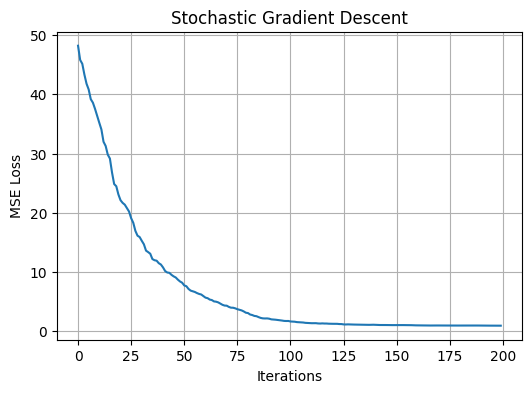

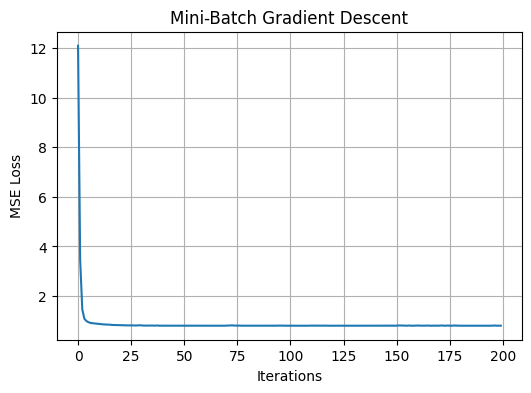

In [11]:
# ------------------------------------------
# 5) Example usage
# ------------------------------------------
if __name__ == "__main__":
    # Create simple regression dataset
    np.random.seed(42)

    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X[:, 0] + np.random.randn(100)

    # Batch GD
    w_b, b_b, loss_b = batch_gradient_descent(X, y, learning_rate=0.1, iterations=200)
    plot_losses(loss_b, "Batch Gradient Descent")

    # SGD
    w_s, b_s, loss_s = stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=200)
    plot_losses(loss_s, "Stochastic Gradient Descent")

    # Mini-Batch GD
    w_m, b_m, loss_m = mini_batch_gradient_descent(X, y, batch_size=16, learning_rate=0.05, iterations=200)
    plot_losses(loss_m, "Mini-Batch Gradient Descent")